<a href="https://colab.research.google.com/github/4gzjw4dq7h-coder/SDRIS-Simulation-Library/blob/main/Kopie_von_ourobouros_sim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Starte SDRIS Simulation...
Axiom I-4 Tilt Matrix:
[[ 0.+0.j  0.+1.j]
 [-0.-1.j  0.+0.j]]

Simulation beendet.
Zeitschritte: 200
Erfolgreiche Externalisationen (Synchronisiert): 21
Quote (Durchlässigkeit von dI): 10.50%


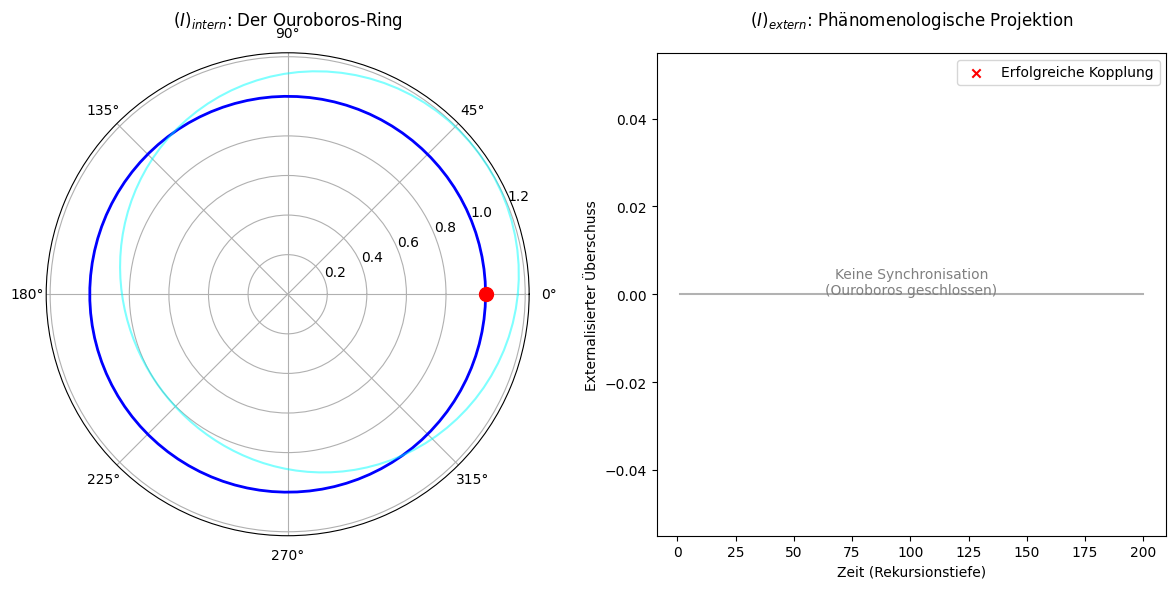

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
from dataclasses import dataclass

# =====================================================
# KONFIGURATION & AXIOMATISCHE KONSTANTEN
# =====================================================
class Axioms:
    TILT_MATRIX = np.array([[0, 1j], [-1j, 0]]) # Axiom I-4 (Tilt J)
    RECURSION_DEPTH = 100    # Axiom I-5 (Zeit)
    SYNC_THRESHOLD = 0.1     # Toleranz für "Zahnrad-Kopplung" (Theorem T-2)

# =====================================================
# KLASSEN FÜR DIE RÄUME (I-intern & I-extern)
# =====================================================

class InternalSpace:
    """
    (I)_intern: Der rekursive, geschlossene Ouroboros-Ring.
    Repräsentiert durch komplexe Zustände auf einem Einheitskreis.
    """
    def __init__(self, n_points=100):
        self.n_points = n_points
        # Initialisierung als "reines Sein" (nahe Axiom I-1)
        # Wir modellieren den Ring als Phasenwinkel
        self.angles = np.linspace(0, 2*np.pi, n_points)
        self.state = np.exp(1j * self.angles) # Komplexe Repräsentation
        self.excess_energy = np.zeros(n_points) # Überschuss (Energy)

    def recurse_R(self, t):
        """Axiom I-2: Rekursive Selbstabbildung R"""
        # Die Rekursion erzeugt "Informationelle Spannung"
        # Wir simulieren dies durch eine Phasenrotation basierend auf dem Tilt
        tilt_factor = np.exp(1j * 0.1 * t)
        self.state = self.state * tilt_factor

        # Erzeuge zufällige "Überschüsse" (Internal Excess)
        self.excess_energy = np.abs(np.sin(self.angles * t))

    def get_projections(self):
        """Axiom I-3: Projektion in S (Struktur/Real) und D (Dynamik/Imag)"""
        S = np.real(self.state)
        D = np.imag(self.state)
        return S, D

class ExternalSpace:
    """
    (I)_extern: Der phänomenologische Raum.
    Hier landen nur wellensynchronisierte Daten.
    """
    def __init__(self):
        self.phenomena = [] # Liste der externalisierten Ereignisse
        self.time_points = []

    def receive(self, t, signal):
        """Theorem T-2.1: Empfang durch den Externalisationskanal"""
        self.phenomena.append(signal)
        self.time_points.append(t)

# =====================================================
# DER MECHANISMUS: OUROBOROS & KOPPLUNG
# =====================================================

class SDRIS_Ouroboros_System:
    def __init__(self):
        self.internal = InternalSpace()
        self.external = ExternalSpace()
        self.t = 0

    def step(self):
        self.t += 1

        # 1. Interne Rekursion (R)
        self.internal.recurse_R(self.t)

        # 2. Projektionen holen (S und D)
        S_int, D_int = self.internal.get_projections()

        # 3. Externalisation prüfen (Theorem T-2 / Zahnrad-Theorie)
        # Wir simulieren eine externe "Wand" (Referenzphase), gegen die geprüft wird.
        # Nur wenn Phase passt (Zahnrad greift), tritt Information aus.
        external_phase_reference = np.sin(self.t * 0.1)

        # Kopplungsbedingung: D_intern ~ S_extern (hier vereinfacht als Referenz)
        # Wir prüfen an einem Punkt (Boundary dI, z.B. Index 0)
        boundary_val = D_int[0]

        if abs(boundary_val - external_phase_reference) < Axioms.SYNC_THRESHOLD:
            # ERFOLGREICHE EXTERNALISATION
            flux = self.internal.excess_energy[0]
            self.external.receive(self.t, flux)
            return True, flux
        else:
            # KEIN LEAK (Korollar T-2.4)
            # Energie bleibt im internen Ring
            self.external.receive(self.t, 0)
            return False, 0

    def internalize(self):
        """Theorem T-4: Dissipative Rückführung"""
        # In dieser Simulation vereinfacht: Der externe State beeinflusst
        # beim nächsten Schritt leicht den internen Tilt (Feedback).
        pass

# =====================================================
# VISUALISIERUNG (Das Diagramm aus dem LaTeX Code)
# =====================================================

def visualize_topology(system):
    fig = plt.figure(figsize=(12, 6))

    # --- Linke Seite: (I)_intern (Polar Plot / Kreis) ---
    ax1 = fig.add_subplot(121, projection='polar')
    ax1.set_title(r"$(I)_{intern}$: Der Ouroboros-Ring", pad=20)

    # Zeichne den Informationsring
    ax1.plot(system.internal.angles, np.ones_like(system.internal.angles),
             color='blue', linewidth=2, label='Information $I$')

    # Zeichne "Wellen" auf dem Ring (S/D Projektionen)
    S, D = system.internal.get_projections()
    ax1.plot(system.internal.angles, 1 + 0.2*S, color='cyan', alpha=0.5, label='Projektion S')

    # Markiere den Boundary Punkt dI
    ax1.scatter(0, 1, color='red', s=100, zorder=10, label=r'Grenzpunkt $\partial I$')

    # --- Rechte Seite: (I)_extern (Zeitreihe / Wand) ---
    ax2 = fig.add_subplot(122)
    ax2.set_title(r"$(I)_{extern}$: Phänomenologische Projektion", pad=20)
    ax2.set_xlabel("Zeit (Rekursionstiefe)")
    ax2.set_ylabel("Externalisierter Überschuss")

    if system.external.time_points:
        times = system.external.time_points
        values = system.external.phenomena

        # Zeichne die Zeitreihe
        ax2.plot(times, values, color='black', alpha=0.3)

        # Highlighte Punkte, wo Externalisation stattfand (Wert > 0)
        ext_times = [t for t, v in zip(times, values) if v > 0]
        ext_vals = [v for v in values if v > 0]
        ax2.scatter(ext_times, ext_vals, color='red', marker='x', label='Erfolgreiche Kopplung')

        if not ext_vals:
            ax2.text(0.5, 0.5, "Keine Synchronisation\n(Ouroboros geschlossen)",
                     ha='center', transform=ax2.transAxes, color='gray')

    plt.legend(loc='upper right')
    plt.tight_layout()
    plt.show()

# =====================================================
# MAIN EXECUTION
# =====================================================

if __name__ == "__main__":
    universe = SDRIS_Ouroboros_System()

    print("Starte SDRIS Simulation...")
    print(f"Axiom I-4 Tilt Matrix:\n{Axioms.TILT_MATRIX}")

    # Simuliere N Schritte
    sync_count = 0
    for i in range(200):
        is_sync, flux = universe.step()
        if is_sync:
            sync_count += 1
            # Feedback Loop (Internalisation)
            universe.internalize()

    print(f"\nSimulation beendet.")
    print(f"Zeitschritte: 200")
    print(f"Erfolgreiche Externalisationen (Synchronisiert): {sync_count}")
    print(f"Quote (Durchlässigkeit von dI): {sync_count/200:.2%}")

    # Visualisierung aufrufen
    visualize_topology(universe)